In [1]:
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
from mmdet.registry import VISUALIZERS
import mmcv

In [2]:
img_path = "test.jpg"

In [3]:
model = init_detector(
    config="config.py",
    checkpoint="work_dir/epoch_50.pth"
)

Loads checkpoint by local backend from path: work_dir/epoch_50.pth


In [4]:
register_all_modules()
model = init_detector(
    "config.py",
    "work_dir/epoch_50.pth",
    device='cuda:0'
)

Loads checkpoint by local backend from path: work_dir/epoch_50.pth


In [5]:
visualizer = VISUALIZERS.build(model.cfg.visualizer)
visualizer.dataset_meta = model.dataset_meta

06/12 19:49:29 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


/root/miniconda3/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/root/mmdetection/mmdet/visualization/palette.py:90: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  scales = 0.5 + (areas - min_area) // (max_area - min_area)


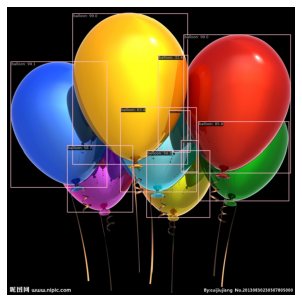

In [6]:
img = mmcv.imread(img_path, channel_order='rgb')
output = inference_detector(model, img)

img_output = visualizer.add_datasample(
    "result",
    img,
    data_sample=output,
    draw_gt=False,
    # draw_heatmap=False,
    # draw_bbox=True,
    # show=False,
    # show_kpt_idx=True,
    # wait_time=0,
    # kpt_thr=.3,
)

visualizer.show()